In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import os
import datetime
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

from tensorflow.keras.losses import CategoricalCrossentropy,SparseCategoricalCrossentropy
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import callbacks

from keras import backend as K

In [51]:
# load in image
# rescale to 48*48
# generate more data with shift rotate grey scale?
# d = Image.open('.././data/images/train/angry/0.jpg')

In [52]:
# Model visual

In [78]:
# img_generator = ImageDataGenerator(rescale=1./255)
# size = (48, 48)
# batch_size = 128
# # 8 min 256
# train_ds = img_generator.flow_from_directory(
#     '.././data/data_split/train',
#     target_size=size
#     ,batch_size=batch_size
# )
# val_ds = img_generator.flow_from_directory(
#     '.././data/data_split/test',
#     target_size=size
#     ,batch_size=batch_size
# )
# test_ds = img_generator.flow_from_directory(
#     '.././data/data_split/val',
#     target_size=size
#     # ,batch_size=batch_size
# )
# class_indi = train_ds.class_indices
# class_count= len(class_indi)

# lb = LabelBinarizer()
# testY = test_ds.classes

# valY = val_ds.classes

# 2023-12-10
img_generator = ImageDataGenerator(
    rescale=1/255,
    rotation_range=10,   
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
    )

img_generator_test = ImageDataGenerator(
    rescale=1/255
    )

size = (48, 48)
batch_size = 256
# 8 min 256
train_ds = img_generator.flow_from_directory(
    '.././data/data_split_2/train',
    target_size=size
    ,batch_size=batch_size
    ,color_mode='grayscale'
    ,seed=42
    ,shuffle=True
)
test_ds = img_generator_test.flow_from_directory(
    '.././data/data_split_2/test',
    target_size=size
    ,batch_size=batch_size
    ,color_mode='grayscale'
    ,seed=42
    ,shuffle=True
)
class_indi = train_ds.class_indices
class_count= len(class_indi)

lb = LabelBinarizer()
testY = test_ds.classes


Found 41743 images belonging to 7 classes.
Found 16799 images belonging to 7 classes.


In [79]:
# model
def experiment_01():
    # epoch 15
    # train loss 0.7117140293121338
    # val_loss loss 1.1653753519058228
    # categorical_accuracy acc 0.7350558638572693
    # val_categorical_accuracy acc 0.587579607963562

    model = keras.Sequential()
    model.add(layers.Conv2D(32,(3,3),padding="same",activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv2D(32,(3,3),padding="same",activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(512,activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(class_count,activation='softmax'))
    return model  
 
def experiment_02():
    # epoch 40
    # train loss 2.2421133518218994
    # val_loss loss 1.2537873983383179
    # categorical_accuracy acc 0.5947182178497314
    # val_categorical_accuracy acc 0.6234391927719116

    model = keras.Sequential()
    model.add(layers.Conv2D(32,(3,3),padding="same",activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32,(3,3),padding="same",activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(64,(3,3),padding="same",activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(64,(3,3),padding="same",activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Flatten())
    model.add(layers.Dense(512,activation='relu'))    
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(class_count,activation='softmax'))
    return model 

def experiment_03():
    # epoch 40
    # train loss 2.2421133518218994
    # val_loss loss 1.2537873983383179
    # categorical_accuracy acc 0.5947182178497314
    # val_categorical_accuracy acc 0.6234391927719116

    model = keras.Sequential()
    model.add(layers.Conv2D(64,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(128,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(256,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(256,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation='relu',kernel_initializer='he_normal'))    
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    model.add(layers.Dense(128,activation='relu',kernel_initializer='he_normal'))    
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    model.add(layers.Dense(class_count,activation='softmax'))
    return model 

In [80]:
import matplotlib.pyplot as  plt
# plt.use("ggplot")
def plot_data(H):
    epochs = H.epoch.__len__()
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["categorical_accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_categorical_accuracy"], label="val_acc")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

In [81]:
# class_weights = class_weight.compute_class_weight(class_weight ='balanced',classes=np.unique(testY),y=train_ds.classes)

In [34]:
from collections import Counter
counter = Counter(train_ds.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}                     

In [82]:

epochs = 40

# opt = optimizers.SGD(learning_rate=0.01,momentum=0.5,nesterov=True,decay=0.01/epochs)
opt = optimizers.Adam(learning_rate=0.01)
loss = keras.losses.CategoricalCrossentropy()
metric = keras.metrics.CategoricalAccuracy()

# save multiple model
# fname = os.path.sep.join([".././model/checkpoint","weights-{epoch:03d}-{val_loss:.4f}.hdf5"])
# fname = ".././model/checkpoint/checkpoint.weights.h5"

# checkpoint = callbacks.ModelCheckpoint(fname, monitor="val_loss", mode="min",save_best_only=True, verbose=1)
# earlystop = callbacks.EarlyStopping(monitor="val_loss",patience=5,verbose=1,mode="auto")
# callback = [checkpoint,earlystop]
# callbacks = [earlystop]
model = experiment_03()
model.compile(optimizer=opt,loss=loss,metrics=[metric])


In [83]:

# H = model.fit(
#     train_ds,
#     epochs=epochs,
#     validation_data=test_ds,
#     # callbacks=callback,
#     class_weight=class_weights
# )
# K.set_value(model.optimizer.learning_rate, 0.00001)
# 2023-12-10
H = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=test_ds
    # ,
    # callbacks=callback,
    # class_weight=class_weights
)


# model.evaluate_generator(generator=test_ds)

# plot_data(H)

Epoch 1/40
164/164 [==============================] - 28s 150ms/step - loss: 1.6653 - categorical_accuracy: 0.3653 - val_loss: 1.5488 - val_categorical_accuracy: 0.4140
Epoch 2/40
164/164 [==============================] - 25s 150ms/step - loss: 1.3208 - categorical_accuracy: 0.4969 - val_loss: 1.2495 - val_categorical_accuracy: 0.5199
Epoch 3/40
164/164 [==============================] - 23s 138ms/step - loss: 1.1827 - categorical_accuracy: 0.5546 - val_loss: 1.8314 - val_categorical_accuracy: 0.3093
Epoch 4/40
164/164 [==============================] - 24s 146ms/step - loss: 1.1280 - categorical_accuracy: 0.5756 - val_loss: 1.0903 - val_categorical_accuracy: 0.5887
Epoch 5/40
164/164 [==============================] - 25s 151ms/step - loss: 1.0644 - categorical_accuracy: 0.6043 - val_loss: 1.4130 - val_categorical_accuracy: 0.4568
Epoch 6/40
164/164 [==============================] - 21s 129ms/step - loss: 1.0400 - categorical_accuracy: 0.6122 - val_loss: 1.0153 - val_categorical_acc

KeyboardInterrupt: 

In [65]:
labels = (train_ds.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predict]

In [76]:
test_ds.classes

array([0, 0, 0, ..., 6, 6, 6])

In [70]:
predict

array([2, 3, 2, ..., 4, 4, 2], dtype=int64)

In [85]:
test_ds.reset()
predict = model.predict(test_ds)
predict = predict.argmax(axis=1)

print(classification_report(testY, predict,target_names=list(test_ds.class_indices.keys())))

plot_data(H)

KeyboardInterrupt: 

In [17]:

H = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=test_ds,
    # callbacks=callback,
    class_weight=class_weights
)


predict = model.predict(val_ds)
predict = predict.argmax(axis=1)

print(classification_report(valY, predict,target_names=list(val_ds.class_indices.keys())))

plot_data(H)

Epoch 1/40
280/280 [==============================] - 47s 167ms/step - loss: 2.0635 - categorical_accuracy: 0.5954 - val_loss: 1.6852 - val_categorical_accuracy: 0.5179
Epoch 2/40
280/280 [==============================] - 88s 314ms/step - loss: 2.0582 - categorical_accuracy: 0.5978 - val_loss: 1.5409 - val_categorical_accuracy: 0.5401
Epoch 3/40
280/280 [==============================] - 31s 111ms/step - loss: 2.0311 - categorical_accuracy: 0.6009 - val_loss: 1.7867 - val_categorical_accuracy: 0.5190
Epoch 4/40
280/280 [==============================] - 14s 52ms/step - loss: 2.0192 - categorical_accuracy: 0.5999 - val_loss: 1.6450 - val_categorical_accuracy: 0.5222
Epoch 5/40
280/280 [==============================] - 14s 49ms/step - loss: 2.0103 - categorical_accuracy: 0.6051 - val_loss: 1.9692 - val_categorical_accuracy: 0.5011
Epoch 6/40
280/280 [==============================] - 13s 47ms/step - loss: 1.9896 - categorical_accuracy: 0.6083 - val_loss: 1.6130 - val_categorical_accura

KeyboardInterrupt: 

              precision    recall  f1-score   support

       angry       0.10      0.05      0.07      1250
     disgust       0.02      0.08      0.04       285
        fear       0.09      0.05      0.06      1095
       happy       0.30      0.34      0.32      3532
     neutral       0.20      0.19      0.19      2415
         sad       0.17      0.11      0.13      2215
    surprise       0.10      0.17      0.13      1140

    accuracy                           0.19     11932
   macro avg       0.14      0.14      0.13     11932
weighted avg       0.19      0.19      0.18     11932



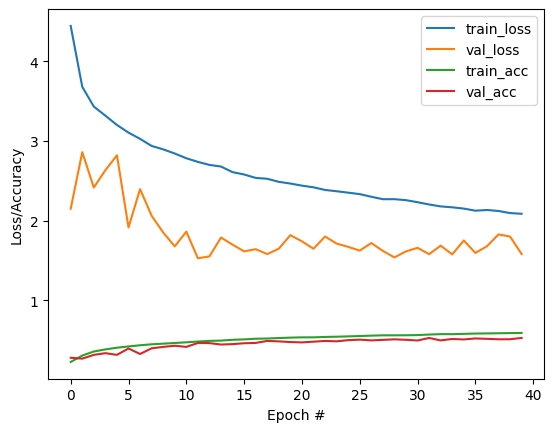

In [18]:

predict = model.predict(val_ds)
predict = predict.argmax(axis=1)

print(classification_report(valY, predict,target_names=list(val_ds.class_indices.keys())))

plot_data(H)

In [ ]:

predict = model.predict(val_ds)
predict = predict.argmax(axis=1)

print(classification_report(valY, predict,target_names=list(val_ds.class_indices.keys())))

plot_data(H)

In [89]:
loss = H.history["loss"][-1]
val_loss = H.history["val_loss"][-1]
categorical_accuracy = H.history["categorical_accuracy"][-1]
val_categorical_accuracy = H.history["val_categorical_accuracy"][-1]
epoch = H.epoch.__len__()
print(f'epoch {epoch}')
print(f'train loss {loss}')
print(f'val_loss loss {val_loss}')
print(f'categorical_accuracy acc {categorical_accuracy}')
print(f'val_categorical_accuracy acc {val_categorical_accuracy}')

TypeError: 'History' object is not callable

In [ ]:
predictions = model.predict(test_ds)
predicted_classes = predictions.argmax(axis=1)
true_classes = test_ds.classes
print(classification_report(true_classes, predicted_classes,target_names=list(test_ds.class_indices.keys())))

In [6]:

def experiment2(height, width, depth):

    inputShape = (height, width, depth)

    if K.image_data_format() == "channels_first":
        inputShape = (depth, height, width)



    model = keras.Sequential()
    model.add(layers.Conv2D(32,(3,3),padding="same",activation='relu',kernel_initializer='he_normal',input_shape=inputShape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Conv2D(128,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation='relu',kernel_initializer='he_normal'))    
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.6))

    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation='relu',kernel_initializer='he_normal'))    
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.6))



    model.add(layers.Dense(6,activation='softmax'))
    return model 

In [7]:
model = experiment2(48,48,3)

In [9]:
model.load_weights('d/weight2.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'd/weight2.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)